In [1]:
import pandas as pd
import gtfs_kit as gk

%load_ext autoreload
%autoreload 2

In [2]:
datos = "/mnt/d/datos/HackTransporte"
feed_file = f"{datos}/hack/Datos y fichas técnicas/Información transporte público/GTFS/gtfs-merida.zip"
gk.list_feed(feed_file)

,file_name,file_size
0,fare_rules.txt,827
1,feed_info.txt,229
2,routes.txt,5510
3,shapes.txt,761641
4,stop_times.txt,39375940
5,stops.txt,231418
6,trips.txt,1273949
7,agency.txt,175
8,calendar.txt,20986
9,fare_attributes.txt,136


In [3]:
feed = gk.read_feed(feed_file, dist_units='km')
feed.describe()

,indicator,value
0,agencies,[Agencia de Transporte de Yucatán (ATY)]
1,timezone,America/Mexico_City
2,start_date,20240911
3,end_date,20241231
4,num_routes,83
5,num_trips,14620
6,num_stops,4352
7,num_shapes,86
8,sample_date,20240919
9,num_routes_active_on_sample_date,81


In [5]:
feed.validate()

,type,message,table,rows
3,error,Invalid route_color; maybe has extra space cha...,routes,[34]
0,warning,Unrecognized column agency_id,fare_attributes,[]
1,warning,Unrecognized column default_lang,feed_info,[]
2,warning,Unrecognized column feed_contact_url,feed_info,[]
5,warning,"Repeated pair (trip_id, departure_time)",stop_times,"[1, 10, 42, 43, 55, 64, 96, 97, 109, 118, 150,..."
4,warning,Stop has no stop times,stops,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [6]:
feed.stop_times.head(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,timepoint
0,2124510,03:45:00,03:45:00,18284,1,0,0
1,2124510,03:45:00,03:45:00,16770,2,3,0
2,2124510,03:47:00,03:47:00,16748,3,730,0
3,2124510,03:48:00,03:48:00,16725,4,1200,0
4,2124510,03:49:00,03:49:00,16724,5,1675,0


In [32]:
# Tiempos de paradas en estación
feed.stop_times.to_csv(f"{datos}/hack/stop_times_merida.csv", index=False)
feed.stop_times.head(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,timepoint
0,2124510,03:45:00,03:45:00,18284,1,0,0
1,2124510,03:45:00,03:45:00,16770,2,3,0
2,2124510,03:47:00,03:47:00,16748,3,730,0
3,2124510,03:48:00,03:48:00,16725,4,1200,0
4,2124510,03:49:00,03:49:00,16724,5,1675,0


In [31]:
# Rutas
shapes = feed.get_shapes(as_gdf=True).cx[-89.8:-89.5, :]
shapes["route_id"] = shapes["shape_id"].str.split("D").str[0].astype(int)
shapes.to_file(f"{datos}/hack/rutas_merida.geojson", driver='GeoJSON')
shapes.head(2)

,shape_id,geometry,route_id
0,1070D-1,"LINESTRING (-89.67631 20.99132, -89.67676 20.9...",1070
1,1071D-1,"LINESTRING (-89.67619 20.9904, -89.67518 20.99...",1071


In [ ]:
# Paradas
stops = feed.get_stops(as_gdf=True).cx[-89.8:-89.5, :]
stops.to_file(f"{datos}/hack/paradas_merida.geojson", driver='GeoJSON')
stops.head(2)

,stop_id,stop_name,location_type,wheelchair_boarding,geometry
0,212,plaza grande,0,1,POINT (-89.62369 20.9665)
1,231,Fin de ruta,0,1,POINT (-89.6258 20.96787)


In [7]:
# Append shape_dist_traveled column to stop times

display(feed.stop_times.head())

feed = feed.append_dist_to_stop_times()
feed.stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,timepoint
0,2124510,03:45:00,03:45:00,18284,1,0,0
1,2124510,03:45:00,03:45:00,16770,2,3,0
2,2124510,03:47:00,03:47:00,16748,3,730,0
3,2124510,03:48:00,03:48:00,16725,4,1200,0
4,2124510,03:49:00,03:49:00,16724,5,1675,0


/home/jjsantos/.pyenv/versions/3.10.6/envs/geo/lib/python3.10/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)
/home/jjsantos/.pyenv/versions/3.10.6/envs/geo/lib/python3.10/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,timepoint,shape_dist_traveled
0,2124510,03:45:00,03:45:00,18284,1,0,0.000000
1,2124510,03:45:00,03:45:00,16770,2,0,0.002627
2,2124510,03:47:00,03:47:00,16748,3,0,0.730407
3,2124510,03:48:00,03:48:00,16725,4,0,1.201433
4,2124510,03:49:00,03:49:00,16724,5,0,1.677366


In [10]:
# Choose study dates

week = feed.get_first_week()
dates = [week[4], week[6]]  # First Friday and Sunday
dates

['20240920', '20240922']

In [13]:
# Compute feed time series

trip_stats = feed.compute_trip_stats()
display(trip_stats.head())
fts = feed.compute_feed_time_series(trip_stats, dates, freq='12h')
fts

,trip_id,route_id,route_short_name,route_type,direction_id,shape_id,stop_pattern_name,num_stops,start_time,end_time,start_stop_id,end_stop_id,is_loop,duration,distance,speed
2389,2160760,1070,R10001,3,0,1070D-1,0-1,42,03:15:00,05:25:00,15503,15504,1,2.166667,49.625182,22.90393
2497,2160868,1070,R10001,3,0,1070D-1,0-1,42,03:15:00,05:25:00,15503,15504,1,2.166667,49.625182,22.90393
2390,2160761,1070,R10001,3,0,1070D-1,0-1,42,03:30:00,05:40:00,15503,15504,1,2.166667,49.625182,22.90393
2498,2160869,1070,R10001,3,0,1070D-1,0-1,42,03:30:00,05:40:00,15503,15504,1,2.166667,49.625182,22.90393
2608,2160979,1070,R10001,3,0,1070D-1,0-1,42,03:30:00,05:40:00,15503,15504,1,2.166667,49.625182,22.90393


indicator,num_trip_ends,num_trip_starts,num_trips,service_distance,service_duration,service_speed
datetime,,,,,,
2024-09-20 00:00:00,2323.0,2887.0,2885.0,69813.725112,4427.233333,15.769154
2024-09-20 12:00:00,4063.0,3612.0,4174.0,100799.530200,6399.150000,15.752019
2024-09-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-22 00:00:00,1444.0,1806.0,1805.0,41667.187955,2485.583333,16.763545
2024-09-22 12:00:00,2822.0,2507.0,2868.0,67078.135577,3992.000000,16.803140


In [16]:
gk.downsample(fts, freq='12h')


indicator,num_trip_ends,num_trip_starts,num_trips,service_distance,service_duration,service_speed
datetime,,,,,,
2024-09-20 00:00:00,2323.0,2887.0,2885.0,69813.725112,4427.233333,15.769154
2024-09-20 12:00:00,4063.0,3612.0,4174.0,100799.530200,6399.150000,15.752019
2024-09-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-22 00:00:00,1444.0,1806.0,1805.0,41667.187955,2485.583333,16.763545
2024-09-22 12:00:00,2822.0,2507.0,2868.0,67078.135577,3992.000000,16.803140


In [17]:
# Compute feed stats for first week

feed_stats = feed.compute_feed_stats(trip_stats, week)
feed_stats

,num_stops,num_routes,num_trips,num_trip_starts,num_trip_ends,service_distance,service_duration,service_speed,peak_num_trips,peak_start_time,peak_end_time,date
0,2622,83,6517,6517,6409,170992.273520,10848.533333,15.761787,625,07:32:00,07:34:00,20240916
0,2622,82,6505,6505,6397,170767.660645,10838.683333,15.755388,624,07:32:00,07:34:00,20240917
0,2622,82,6509,6509,6395,171011.669055,10849.450000,15.762243,624,07:32:00,07:34:00,20240918
0,2622,81,6489,6489,6376,170426.077916,10818.300000,15.753499,625,07:32:00,07:34:00,20240919
0,2622,82,6499,6499,6386,170613.255312,10826.383333,15.759026,624,07:32:00,07:34:00,20240920
0,2622,81,5656,5656,5555,145409.580364,9089.116667,15.998208,519,13:30:00,13:34:00,20240921
0,2622,81,4313,4313,4266,108745.323532,6477.583333,16.787947,372,20:05:00,20:09:00,20240922


In [18]:
# Compute route time series

rts = feed.compute_route_time_series(trip_stats, dates, freq='12h')
rts

indicator           num_trip_ends                                            \
route_id                     1070  1071  1095  1102  1103  1105  1106  1107   
datetime                                                                      
2024-09-20 00:00:00          40.0  40.0  15.0  29.0  29.0  28.0  27.0  18.0   
2024-09-20 12:00:00          68.0  68.0  24.0  54.0  54.0  58.0  54.0  37.0   
2024-09-21 00:00:00           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2024-09-21 12:00:00           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2024-09-22 00:00:00          17.0  17.0  15.0  15.0  14.0  11.0  14.0  11.0   
2024-09-22 12:00:00          37.0  37.0  24.0  30.0  30.0  24.0  30.0  24.0   

indicator                        ... service_speed                        \
route_id             1110  1111  ...          1201       1202       1203   
datetime                         ...                                       
2024-09-20 00:00:00  15.0  18.0  ...     14.691246  14.019178  15.338283   
2024-09-20 12:00:00  33.0  36.0  ...     14.706779  14.019178  15.338283   
2024-09-21 00:00:00   NaN   NaN  ...           NaN        NaN        NaN   
2024-09-21 12:00:00   NaN   NaN  ...           NaN        NaN        NaN   
2024-09-22 00:00:00   8.0  10.0  ...     16.526116  14.019178  15.776519   
2024-09-22 12:00:00  19.0  24.0  ...     16.526116  14.019178  16.072792   

indicator                                                                   \
route_id                  1204       1205       1206       1207       1208   
datetime                                                                     
2024-09-20 00:00:00  22.336320  24.484306  24.332899  15.966367  20.978463   
2024-09-20 12:00:00  22.719562  24.484306  24.332899  15.966367  20.978463   
2024-09-21 00:00:00        NaN        NaN        NaN        NaN        NaN   
2024-09-21 12:00:00        NaN        NaN        NaN        NaN        NaN   
2024-09-22 00:00:00  22.336320  26.932737  27.982834  18.627428  20.978463   
2024-09-22 12:00:00  22.719562  26.932737  27.982834  18.627428  20.978463   

indicator                                  
route_id                  1209        904  
datetime                                   
2024-09-20 00:00:00  20.399299  14.576843  
2024-09-20 12:00:00  20.399299  14.576843  
2024-09-21 00:00:00        NaN        NaN  
2024-09-21 12:00:00        NaN        NaN  
2024-09-22 00:00:00  24.932477  19.095664  
2024-09-22 12:00:00  24.932477  19.095664  

[6 rows x 492 columns]

In [19]:
# Slice time series

inds = ['service_distance', 'service_duration', 'service_speed']
rids = ['1105', '1071']

rts.loc[:, (inds, rids)]

indicator           service_distance              service_duration  \
route_id                        1105         1071             1105   
datetime                                                             
2024-09-20 00:00:00      1300.373003  2365.928281        83.033333   
2024-09-20 12:00:00      2007.199596  3105.280868       128.166667   
2024-09-21 00:00:00              NaN          NaN              NaN   
2024-09-21 12:00:00              NaN          NaN              NaN   
2024-09-22 00:00:00       506.158837  1013.062409        33.666667   
2024-09-22 12:00:00       846.939044  1648.606906        56.333333   

indicator                       service_speed             
route_id                   1071          1105       1071  
datetime                                                  
2024-09-20 00:00:00  104.000000     15.660855  22.749310  
2024-09-20 12:00:00  136.500000     15.660855  22.749310  
2024-09-21 00:00:00         NaN           NaN        NaN  
2024-09-21 12:00:00         NaN           NaN        NaN  
2024-09-22 00:00:00   45.216667     15.034421  22.404624  
2024-09-22 12:00:00   73.583333     15.034421  22.404624

In [20]:
# Slice again by cross-section

rts.xs(rids[0], axis="columns", level=1)

indicator,num_trip_ends,num_trip_starts,num_trips,service_distance,service_duration,service_speed
datetime,,,,,,
2024-09-20 00:00:00,28.0,40.0,40.0,1300.373003,83.033333,15.660855
2024-09-20 12:00:00,58.0,48.0,60.0,2007.199596,128.166667,15.660855
2024-09-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-22 00:00:00,11.0,16.0,16.0,506.158837,33.666667,15.034421
2024-09-22 12:00:00,24.0,20.0,25.0,846.939044,56.333333,15.034421


In [21]:
# Compute trip locations for every hour

rng = pd.date_range('2024-09-20', periods=24, freq='h')
times = [t.strftime('%H:%M:%S') for t in rng]
loc = feed.locate_trips(dates[0], times)
loc.head()

trip_id      time  rel_dist route_id  direction_id shape_id  \
shape_id                                                                     
1070D-1  1749  2160868  04:00:00  0.388597     1070             0  1070D-1   
         1750  2160868  05:00:00  0.933654     1070             0  1070D-1   
         1751  2160869  04:00:00  0.252259     1070             0  1070D-1   
         1752  2160869  05:00:00  0.791040     1070             0  1070D-1   
         1753  2160870  04:00:00  0.132667     1070             0  1070D-1   

                     lon        lat  
shape_id                             
1070D-1  1749 -89.613045  20.916746  
         1750 -89.661737  21.018094  
         1751 -89.668816  20.894540  
         1752 -89.615910  21.045708  
         1753 -89.697966  20.940778

In [22]:
# Build a route timetable

route_id = feed.routes['route_id'].iat[0]
feed.build_route_timetable(route_id, dates)

,route_id,service_id,shape_id,direction_id,trip_headsign,trip_id,block_id,wheelchair_accessible,bikes_allowed,arrival_time,departure_time,stop_id,stop_sequence,timepoint,shape_dist_traveled,date
211434,904,96795LMXJV,904D-1,0,Centro -> Animaya-Bicentenario,2187770,2136820,1,1,03:25:00,03:25:00,324,1,0,0.000000,20240920
211435,904,96795LMXJV,904D-1,0,Centro -> Animaya-Bicentenario,2187770,2136820,1,1,03:25:00,03:25:00,16773,2,0,0.006441,20240920
211436,904,96795LMXJV,904D-1,0,Centro -> Animaya-Bicentenario,2187770,2136820,1,1,03:27:00,03:27:00,16748,3,0,0.653203,20240920
211437,904,96795LMXJV,904D-1,0,Centro -> Animaya-Bicentenario,2187770,2136820,1,1,03:29:00,03:29:00,16930,4,0,1.252908,20240920
211438,904,96795LMXJV,904D-1,0,Centro -> Animaya-Bicentenario,2187770,2136820,1,1,03:30:00,03:30:00,16931,5,0,1.567920,20240920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206893,904,96793D,904D-1,0,Centro -> Animaya-Bicentenario,2187713,2136763,1,1,23:04:00,23:04:00,1386,77,0,29.654785,20240922
206894,904,96793D,904D-1,0,Centro -> Animaya-Bicentenario,2187713,2136763,1,1,23:04:00,23:04:00,16745,78,0,29.942515,20240922
206895,904,96793D,904D-1,0,Centro -> Animaya-Bicentenario,2187713,2136763,1,1,23:05:00,23:05:00,16746,79,0,30.485158,20240922
206896,904,96793D,904D-1,0,Centro -> Animaya-Bicentenario,2187713,2136763,1,1,23:06:00,23:06:00,16330,80,0,30.962696,20240922


In [23]:
# Map routes

rsns = feed.routes["route_short_name"].iloc[20:24]
rsns

20     R92
21     R94
22     R95
23    R108
Name: route_short_name, dtype: object

<Axes: >

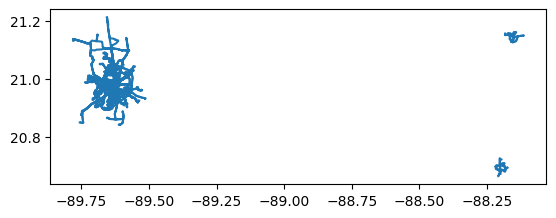

In [25]:
shapes.iloc[0:200].plot()

In [28]:
stops = feed.get_stops(as_gdf=True)
stops.head()

,stop_id,stop_name,location_type,wheelchair_boarding,geometry
0,212,plaza grande,0,1,POINT (-89.62369 20.9665)
1,231,Fin de ruta,0,1,POINT (-89.6258 20.96787)
2,232,Inicio de ruta,0,1,POINT (-89.62715 20.96697)
3,233,Inicio de ruta,0,1,POINT (-89.6258 20.96787)
4,234,Fin de ruta,0,1,POINT (-89.62715 20.96697)


<Axes: >

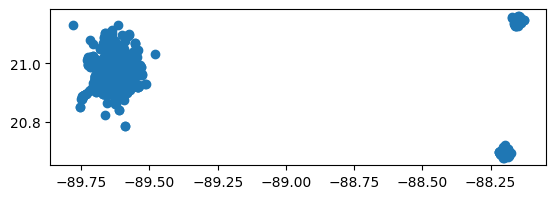

In [29]:
stops.sample(2000).plot()

<Axes: >

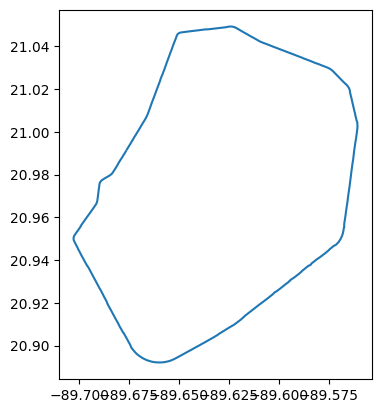

In [30]:
shapes.iloc[[0]].plot()

In [31]:
stops.intersects(shapes.buffer(0.00001).loc[0]).sum()

/tmp/ipykernel_22414/1845265612.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stops.intersects(shapes.buffer(0.00001).loc[0]).sum()


np.int64(27)

/tmp/ipykernel_22414/2739383961.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax = shapes.buffer(0.001).loc[[0]].plot(color="red")


<Axes: >

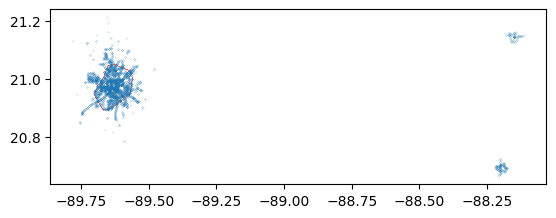

In [32]:
ax = shapes.buffer(0.001).loc[[0]].plot(color="red")
stops.plot(markersize=0.01, ax=ax)

In [33]:
# Maybe a useful function to add
def compute_stop_time_stats(feed):
    if "shape_dist_traveled" in feed.stop_times.columns:
        st = feed.stop_times.copy()
    else:
        st = feed.append_dist_to_stop_times().stop_times
    f = st.sort_values(["trip_id", "stop_sequence"])

    # Choose strategy for calculating duration to next stop
    if (
        f["arrival_time"].count() > 0.5 * f["arrival_time"].shape[0]
        and f["departure_time"].count() > 0.5 * f["departure_time"].shape[0]
    ):
        # Use stop departure to next stop arrival as duration
        f["atime"] = f["arrival_time"].map(gk.timestr_to_seconds)
        f["dtime"] = f["departure_time"].map(gk.timestr_to_seconds)
        f["duration_to_next_stop"] = f.groupby("trip_id")["atime"].shift(-1) - f["dtime"]
    elif f["arrival_time"].count() > 0.5 * f["arrival_time"].shape[0]:
        # Use stop arrival to next stop arrival as duration
        f["atime"] = f["arrival_time"].apply(gk.timestr_to_seconds)
        f["duration_to_next_stop"] = f.groupby("trip_id")["atime"].diff().shift(-1)
    else:
        # Nothing satisfactory, so just use departure times and get many NAs
        f["dtime"] = f["departure_time"].map(gk.timestr_to_seconds)
        f["duration_to_next_stop"] = f.groupby("trip_id")["dtime"].diff().shift(-1)

    # convert to km or mi
    if gk.is_metric(feed.dist_units):
        g = gk.get_convert_dist(feed.dist_units, "km")
    else:
        g = gk.get_convert_dist(feed.dist_units, "mi")

    f["distance_to_next_stop"] = f.groupby('trip_id')['shape_dist_traveled'].diff().shift(-1)  # feed.dist_units
    f["speed_to_next_stop"] = f["distance_to_next_stop"].map(g) / (f["duration_to_next_stop"] / 3600) # km/h or mi/h
    return f.drop(["atime", "dtime"], axis=1)

compute_stop_time_stats(feed).head(38)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,timepoint,shape_dist_traveled,duration_to_next_stop,distance_to_next_stop,speed_to_next_stop
0,2124510,03:45:00,03:45:00,18284,1,0,0.000000,0.0,0.002627,inf
1,2124510,03:45:00,03:45:00,16770,2,0,0.002627,120.0,0.727780,21.833393
2,2124510,03:47:00,03:47:00,16748,3,0,0.730407,60.0,0.471026,28.261577
3,2124510,03:48:00,03:48:00,16725,4,0,1.201433,60.0,0.475933,28.555986
4,2124510,03:49:00,03:49:00,16724,5,0,1.677366,60.0,0.430418,25.825067
5,2124510,03:50:00,03:50:00,16723,6,0,2.107784,60.0,0.433118,25.987076
6,2124510,03:51:00,03:51:00,16922,7,0,2.540902,60.0,0.327787,19.667201
7,2124510,03:52:00,03:52:00,16923,8,0,2.868689,60.0,0.352666,21.159957
8,2124510,03:53:00,03:53:00,16618,9,0,3.221355,60.0,0.454313,27.258788
9,2124510,03:54:00,03:54:00,16617,10,0,3.675668,0.0,0.203928,inf


In [39]:
datos

'/mnt/d/datos/HackTransporte'

In [41]:
shapes.to_file(f"{datos}/hack/rutas_tp_merida.geojson", driver='GeoJSON')

OSError: [Errno 22] Invalid argument: '/mnt/g/Mi unidad/HackRutaUrbana/gtfs'